# Compare CER snow depth years 
* using the data John processed from WY2023 (rapid collection 7 March 2023)
* and using the data from Susan's sites WY2021 (ncalm collection 1 April 2021)

For the sites that are the same between years (untouched). Which are CN Gap, Forest, and CS Gap Forest.\
We want to see if we need to do a multiplication factor between snow depth during the years to compare the lidar data. 

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

In [2]:
sns.set_theme()

In [3]:
# John's imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as datetime
from matplotlib import dates
import seaborn as sns 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# Our current folder, 
# C:\Users\Lumbr\OneDrive - UW\Documents\Washington\EasternCascades\Python\CER_Timeseries_Anaylsis

# Folder that the data is in, 
# E:\CassieLumbrazo\Data\field_data_proccessed_byJohn\FinalData\ProcessedCameraData\

Open Susan's data first, from previous years at cle elum ridge

In [5]:
# read in data from WY21
CNF21 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_Dickersonetal2023\\SnowDepthFromTimelapsePhotos\\CNF_WDNR-M6_WY21.csv", skiprows=[0])
CNG21 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_Dickersonetal2023\\SnowDepthFromTimelapsePhotos\\CNG_WDNR-M1_WY21.csv", skiprows=[0])

CSF21 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_Dickersonetal2023\\SnowDepthFromTimelapsePhotos\\CSF_WDNR-A4_WY21.csv", skiprows=[0])
CSG21 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_Dickersonetal2023\\SnowDepthFromTimelapsePhotos\\CSG_WDNR-M4_WY21.csv", skiprows=[0])

# make date column datetime object
CNF21['Date'] = pd.to_datetime(CNF21['Date'])
CNG21['Date'] = pd.to_datetime(CNG21['Date'])
CSF21['Date'] = pd.to_datetime(CSF21['Date'])
CSG21['Date'] = pd.to_datetime(CSG21['Date'])

# set date column as index
CNF21.index = pd.DatetimeIndex(CNF21['Date'])
CNG21.index = pd.DatetimeIndex(CNG21['Date'])
CSF21.index = pd.DatetimeIndex(CSF21['Date'])
CSG21.index = pd.DatetimeIndex(CSG21['Date'])

# # drop extra date column
# CNF21.drop(columns=['Date'], inplace=True)
# CNG21.drop(columns=['Date'], inplace=True)
# CSF21.drop(columns=['Date'], inplace=True)
# CSG21.drop(columns=['Date'], inplace=True)

Open John's data from this water year at cle elum ridge

In [6]:
# the sites that match susan's sites
CNF23 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-FProcessedData.csv")
CNG23 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-GProcessedData.csv")

CSF23  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-FProcessedData.csv")
CSG23  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-GProcessedData.csv")

# # the other sites with forest perscriptions
# CN20  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-20ProcessedData.csv")
# CN50  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-50ProcessedData.csv")
# CN60  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-60ProcessedData.csv")
# CN70  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-70ProcessedData.csv")

# CS20   = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-20ProcessedData.csv")
# CS50   = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-50ProcessedData.csv")
# CS60   = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-60ProcessedData.csv")
# CS120  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-120ProcessedData.csv")


In [7]:
# make date column datetime object
CNF23['Date'] = pd.to_datetime(CNF23['Date'])
CNG23['Date'] = pd.to_datetime(CNG23['Date'])
CSF23['Date'] = pd.to_datetime(CSF23['Date'])
CSG23['Date'] = pd.to_datetime(CSG23['Date'])

# set date column as index
CNF23.index = pd.DatetimeIndex(CNF23['Date'])
CNG23.index = pd.DatetimeIndex(CNG23['Date'])
CSF23.index = pd.DatetimeIndex(CSF23['Date'])
CSG23.index = pd.DatetimeIndex(CSG23['Date'])

# # drop extra date column
# CNF23.drop(columns=['Date'], inplace=True)
# CNG23.drop(columns=['Date'], inplace=True)
# CSF23.drop(columns=['Date'], inplace=True)
# CSG23.drop(columns=['Date'], inplace=True)

Now all the data is loaded in, let's plot the snow depth from the different years together\
Based on how the dataframes look, I'd have to do a bit more work to make them tidy.\
Perhaps I do later, but for now, lets get some quick plots of the two years together.

In [8]:
#Calculate statistics for snow depth (minimum depth, maximum depth, and median depth)
#Because there are only three poles for each site, each statistic represents the value of a single pole
# WY2021
CNF21['Median_depth']  = CNF21[["PoleL","PoleC","PoleR"]].median(axis=1)
CNF21['Maximum_depth'] = CNF21[["PoleL","PoleC","PoleR"]].max(axis=1)
CNF21['Minimum_depth'] = CNF21[["PoleL","PoleC","PoleR"]].min(axis=1)

# there is no center pole for this site 
CNG21['Median_depth']  = CNG21[["PoleL","PoleR"]].median(axis=1) 
CNG21['Maximum_depth'] = CNG21[["PoleL","PoleR"]].max(axis=1)
CNG21['Minimum_depth'] = CNG21[["PoleL","PoleR"]].min(axis=1)

CSF21['Median_depth']  = CSF21[["PoleL","PoleC","PoleR"]].median(axis=1)
CSF21['Maximum_depth'] = CSF21[["PoleL","PoleC","PoleR"]].max(axis=1)
CSF21['Minimum_depth'] = CSF21[["PoleL","PoleC","PoleR"]].min(axis=1)
CSG21['Median_depth']  = CSG21[["PoleL","PoleC","PoleR"]].median(axis=1)
CSG21['Maximum_depth'] = CSG21[["PoleL","PoleC","PoleR"]].max(axis=1)
CSG21['Minimum_depth'] = CSG21[["PoleL","PoleC","PoleR"]].min(axis=1)

# WY2023
CNF23['Median_depth']  = CNF23[["Pole1","Pole2","Pole3"]].median(axis=1)
CNF23['Maximum_depth'] = CNF23[["Pole1","Pole2","Pole3"]].max(axis=1)
CNF23['Minimum_depth'] = CNF23[["Pole1","Pole2","Pole3"]].min(axis=1)
CNG23['Median_depth']  = CNG23[["Pole1","Pole2","Pole3"]].median(axis=1)
CNG23['Maximum_depth'] = CNG23[["Pole1","Pole2","Pole3"]].max(axis=1)
CNG23['Minimum_depth'] = CNG23[["Pole1","Pole2","Pole3"]].min(axis=1)

CSF23['Median_depth']  = CSF23[["Pole1","Pole2","Pole3"]].median(axis=1)
CSF23['Maximum_depth'] = CSF23[["Pole1","Pole2","Pole3"]].max(axis=1)
CSF23['Minimum_depth'] = CSF23[["Pole1","Pole2","Pole3"]].min(axis=1)
CSG23['Median_depth']  = CSG23[["Pole1","Pole2","Pole3"]].median(axis=1)
CSG23['Maximum_depth'] = CSG23[["Pole1","Pole2","Pole3"]].max(axis=1)
CSG23['Minimum_depth'] = CSG23[["Pole1","Pole2","Pole3"]].min(axis=1)

Try plotting the years together

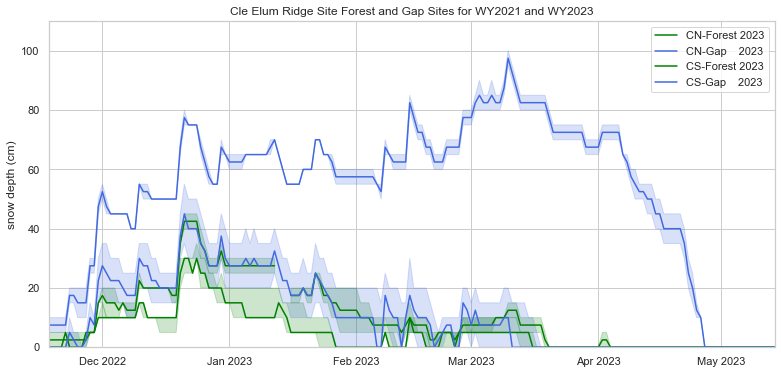

In [9]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (13,6))

alpha=0.2
colorf1 = "black"
colorg1 = "darkgreen"

colorf2 = "green"
colorg2 = "royalblue"

# #WY2021
# ax.fill_between(CNF21['Date'], CNF21['Maximum_depth'], CNF21['Minimum_depth'], color = colorf1, alpha = alpha)
# ax.fill_between(CNG21['Date'], CNG21['Maximum_depth'], CNG21['Minimum_depth'], color = colorg1, alpha = alpha)
# ax.fill_between(CSF21['Date'], CSF21['Maximum_depth'], CSF21['Minimum_depth'], color = colorf1, alpha = alpha)
# ax.fill_between(CSG21['Date'], CSG21['Maximum_depth'], CSG21['Minimum_depth'], color = colorg1, alpha = alpha)

# ax.plot(CNF23['Date'], CNF23['Median_depth'], label = "CN-Forest 2023", color = colorf1)
# ax.plot(CNG23['Date'], CNG23['Median_depth'], label = "CN-Gap    2023", color = colorg1)
# ax.plot(CSF23['Date'], CSF23['Median_depth'], label = "CS-Forest 2023", color = colorf1)
# ax.plot(CSG23['Date'], CSG23['Median_depth'], label = "CS-Gap    2023", color = colorg1)

#WY2023
ax.fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg2, alpha = alpha)
ax.fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax.plot(CNF23['Date'], CNF23['Median_depth'], label = "CN-Forest 2023", color = colorf2)
ax.plot(CNG23['Date'], CNG23['Median_depth'], label = "CN-Gap    2023", color = colorg2)
ax.plot(CSF23['Date'], CSF23['Median_depth'], label = "CS-Forest 2023", color = colorf2)
ax.plot(CSG23['Date'], CSG23['Median_depth'], label = "CS-Gap    2023", color = colorg2)


ax.set_ylim(0,110)
ax.set_xlim([datetime.date(2022, 11, 18), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax.set_ylabel("snow depth (cm)")
plt.title("Cle Elum Ridge Site Forest and Gap Sites for WY2021 and WY2023")
plt.legend()

Now, put the two years together on a plot.\
However, we are going to have issues with the year, we are going to have to remove the date index 

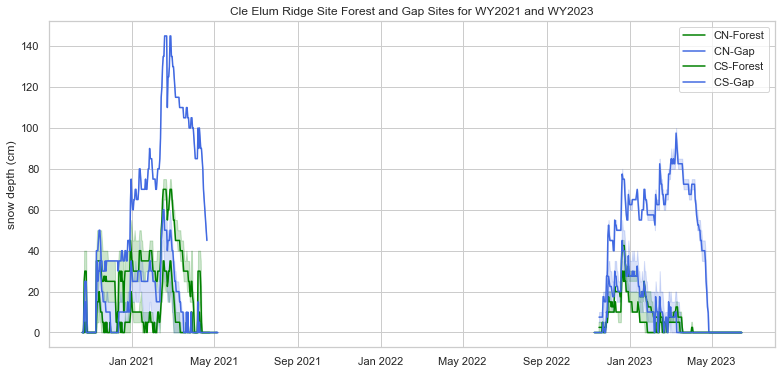

In [10]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (13,6))

alpha=0.2
colorf1 = "black"
colorg1 = "darkgreen"

colorf2 = "green"
colorg2 = "royalblue"

#WY2021
ax.fill_between(CNF21['Date'], CNF21['Maximum_depth'], CNF21['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CNG21['Date'], CNG21['Maximum_depth'], CNG21['Minimum_depth'], color = colorg2, alpha = alpha)
ax.fill_between(CSF21['Date'], CSF21['Maximum_depth'], CSF21['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CSG21['Date'], CSG21['Maximum_depth'], CSG21['Minimum_depth'], color = colorg2, alpha = alpha)

ax.plot(CNF21['Date'], CNF21['Median_depth'], label = "CN-Forest", color = colorf2)
ax.plot(CNG21['Date'], CNG21['Median_depth'], label = "CN-Gap   ", color = colorg2)
ax.plot(CSF21['Date'], CSF21['Median_depth'], label = "CS-Forest", color = colorf2)
ax.plot(CSG21['Date'], CSG21['Median_depth'], label = "CS-Gap   ", color = colorg2)

#WY2023
ax.fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg2, alpha = alpha)
ax.fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax.plot(CNF23['Date'], CNF23['Median_depth'], color = colorf2)
ax.plot(CNG23['Date'], CNG23['Median_depth'], color = colorg2)
ax.plot(CSF23['Date'], CSF23['Median_depth'], color = colorf2)
ax.plot(CSG23['Date'], CSG23['Median_depth'], color = colorg2)


# ax.set_ylim(0,110)
# ax.set_xlim([datetime.date(2022, 11, 18), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax.set_ylabel("snow depth (cm)")
plt.title("Cle Elum Ridge Site Forest and Gap Sites for WY2021 and WY2023")
plt.legend()

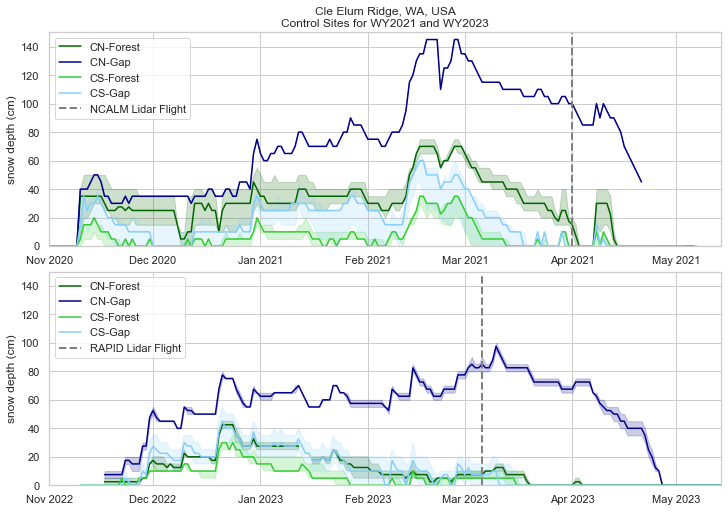

In [11]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,1,figsize = (10,7), constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2021
ax[0].fill_between(CNF21['Date'], CNF21['Maximum_depth'], CNF21['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0].fill_between(CNG21['Date'], CNG21['Maximum_depth'], CNG21['Minimum_depth'], color = colorg1, alpha = alpha)
ax[0].fill_between(CSF21['Date'], CSF21['Maximum_depth'], CSF21['Minimum_depth'], color = colorf2, alpha = alpha)
ax[0].fill_between(CSG21['Date'], CSG21['Maximum_depth'], CSG21['Minimum_depth'], color = colorg2, alpha = alpha)

ax[0].plot(CNF21['Date'], CNF21['Median_depth'], label = "CN-Forest", color = colorf1)
ax[0].plot(CNG21['Date'], CNG21['Median_depth'], label = "CN-Gap   ", color = colorg1)
ax[0].plot(CSF21['Date'], CSF21['Median_depth'], label = "CS-Forest", color = colorf2)
ax[0].plot(CSG21['Date'], CSG21['Median_depth'], label = "CS-Gap   ", color = colorg2)

#WY2023
ax[1].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax[1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest")
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap   ")
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf2, label="CS-Forest")
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg2, label="CS-Gap   ")


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2021, 4, 1), color='grey', linestyle='--', label="NCALM Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
ax[1].set_ylabel("snow depth (cm)")

ax[0].set_title("Cle Elum Ridge, WA, USA\nControl Sites for WY2021 and WY2023")
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

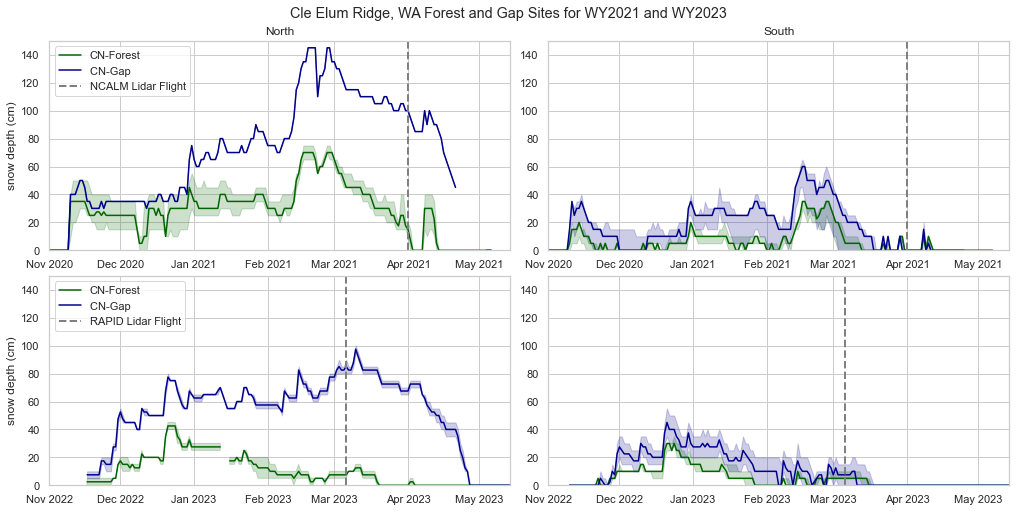

In [12]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2,figsize = (14,7),sharex=False, sharey=False, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2021
ax[0,0].fill_between(CNF21['Date'], CNF21['Maximum_depth'], CNF21['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0,0].fill_between(CNG21['Date'], CNG21['Maximum_depth'], CNG21['Minimum_depth'], color = colorg1, alpha = alpha)
ax[0,1].fill_between(CSF21['Date'], CSF21['Maximum_depth'], CSF21['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0,1].fill_between(CSG21['Date'], CSG21['Maximum_depth'], CSG21['Minimum_depth'], color = colorg1, alpha = alpha)

ax[0,0].plot(CNF21['Date'], CNF21['Median_depth'], label = "CN-Forest", color = colorf1)
ax[0,0].plot(CNG21['Date'], CNG21['Median_depth'], label = "CN-Gap   ", color = colorg1)
ax[0,1].plot(CSF21['Date'], CSF21['Median_depth'], label = "CS-Forest", color = colorf1)
ax[0,1].plot(CSG21['Date'], CSG21['Median_depth'], label = "CS-Gap   ", color = colorg1)

#WY2023
ax[1,0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1,0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1,1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1,1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

ax[1,0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest")
ax[1,0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap   ")
ax[1,1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest")
ax[1,1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap   ")


# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2021, 4, 1), color='grey', linestyle='--', label="NCALM Lidar Flight", linewidth=2)
ax[0,1].axvline(x=datetime.date(2021, 4, 1), color='grey', linestyle='--', label="NCALM Lidar Flight", linewidth=2)

ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0,0].set_ylim(0,150)
ax[0,1].set_ylim(0,150)
ax[1,0].set_ylim(0,150)
ax[1,1].set_ylim(0,150)

ax[0,0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[0,1].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1,0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1,1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1,0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1,1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0,0].set_ylabel("snow depth (cm)")
ax[1,0].set_ylabel("snow depth (cm)")

fig.suptitle("Cle Elum Ridge, WA Forest and Gap Sites for WY2021 and WY2023")
ax[0,0].set_title("North")
ax[0,1].set_title("South")

ax[0,0].legend(loc='upper left')
ax[1,0].legend(loc='upper left')

Okay, if we want to plot snow depth at the sites together,\
then we have to drop the year... or create a DOY column and plot on that instead. 

In [13]:
CNF21b = CNF21.copy()
CNG21b = CNG21.copy()
CSF21b = CSF21.copy()
CSG21b = CSG21.copy()

CNF23b = CNF23.copy()
CNG23b = CNG23.copy()
CSF23b = CSF23.copy()
CSG23b = CSG23.copy()

# okay, github copilot recommended this instead? let's try 
CNF21b['Date'] = CNF21b['Date'] + pd.DateOffset(years=2)
CNG21b['Date'] = CNG21b['Date'] + pd.DateOffset(years=2)
CSF21b['Date'] = CSF21b['Date'] + pd.DateOffset(years=2)
CSG21b['Date'] = CSG21b['Date'] + pd.DateOffset(years=2)

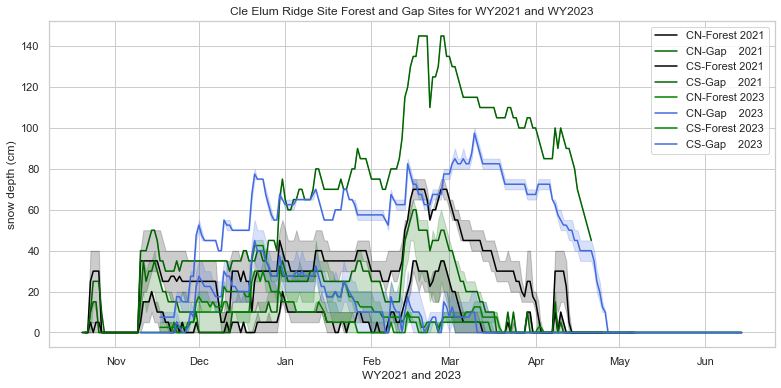

In [14]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (13,6))

alpha=0.2
colorf1 = "black"
colorg1 = "darkgreen"

colorf2 = "green"
colorg2 = "royalblue"

#WY2021
ax.fill_between(CNF21b['Date'], CNF21b['Maximum_depth'], CNF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax.fill_between(CNG21b['Date'], CNG21b['Maximum_depth'], CNG21b['Minimum_depth'], color = colorg1, alpha = alpha)
ax.fill_between(CSF21b['Date'], CSF21b['Maximum_depth'], CSF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax.fill_between(CSG21b['Date'], CSG21b['Maximum_depth'], CSG21b['Minimum_depth'], color = colorg1, alpha = alpha)

ax.plot(CNF21b['Date'], CNF21b['Median_depth'], label = "CN-Forest 2021", color = colorf1)
ax.plot(CNG21b['Date'], CNG21b['Median_depth'], label = "CN-Gap    2021", color = colorg1)
ax.plot(CSF21b['Date'], CSF21b['Median_depth'], label = "CS-Forest 2021", color = colorf1)
ax.plot(CSG21b['Date'], CSG21b['Median_depth'], label = "CS-Gap    2021", color = colorg1)

#WY2023
ax.fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg2, alpha = alpha)
ax.fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax.fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax.plot(CNF23['Date'], CNF23['Median_depth'], color = colorf2, label = "CN-Forest 2023")
ax.plot(CNG23['Date'], CNG23['Median_depth'], color = colorg2, label = "CN-Gap    2023")
ax.plot(CSF23['Date'], CSF23['Median_depth'], color = colorf2, label = "CS-Forest 2023")
ax.plot(CSG23['Date'], CSG23['Median_depth'], color = colorg2, label = "CS-Gap    2023")


# ax.set_ylim(0,110)
# ax.set_xlim([datetime.date(2022, 11, 18), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.set_xlabel("WY2021 and 2023")
ax.set_ylabel("snow depth (cm)")
plt.title("Cle Elum Ridge Site Forest and Gap Sites for WY2021 and WY2023")
plt.legend()

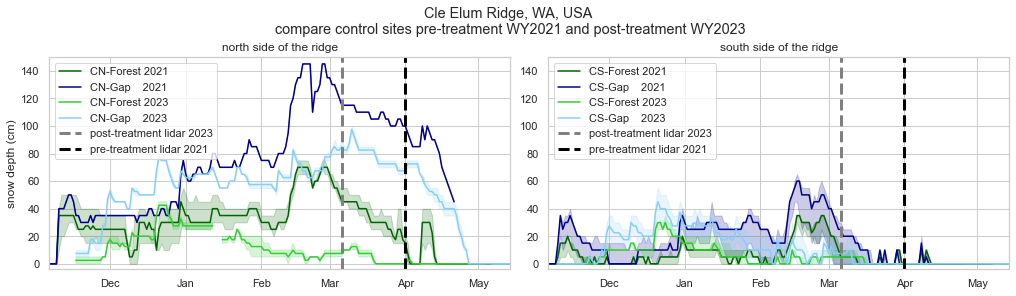

In [18]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2021
ax[0].fill_between(CNF21b['Date'], CNF21b['Maximum_depth'], CNF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0].fill_between(CNG21b['Date'], CNG21b['Maximum_depth'], CNG21b['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1].fill_between(CSF21b['Date'], CSF21b['Maximum_depth'], CSF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CSG21b['Date'], CSG21b['Maximum_depth'], CSG21b['Minimum_depth'], color = colorg1, alpha = alpha)

ax[0].plot(CNF21b['Date'], CNF21b['Median_depth'], label = "CN-Forest 2021", color = colorf1)
ax[0].plot(CNG21b['Date'], CNG21b['Median_depth'], label = "CN-Gap    2021", color = colorg1)
ax[1].plot(CSF21b['Date'], CSF21b['Median_depth'], label = "CS-Forest 2021", color = colorf1)
ax[1].plot(CSG21b['Date'], CSG21b['Median_depth'], label = "CS-Gap    2021", color = colorg1)

#WY2023
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg2, alpha = alpha)
ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf2, label="CN-Forest 2023")
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg2, label="CN-Gap    2023")
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf2, label="CS-Forest 2023")
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg2, label="CS-Gap    2023")


# add lines for the lidar data flights
# ax[0].axvline(x=datetime.date(2021, 4, 1), color='k', linestyle='--', label="NCALM Lidar Flight")
# ax[1].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")


# set plotting constants
ax[0].set_ylim(-4,150)
ax[1].set_ylim(-4,150)

ax[0].set_xlim([datetime.date(2020, 11, 6), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA\n compare control sites pre-treatment WY2021 and post-treatment WY2023")

# add lidar flight dates
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar 2023", linewidth=3)
ax[0].axvline(x=datetime.date(2023, 4, 1), color='black', linestyle='--', label="pre-treatment lidar 2021", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar 2023", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 4, 1), color='black', linestyle='--', label="pre-treatment lidar 2021", linewidth=3)

ax[0].set_title("north side of the ridge")
ax[1].set_title("south side of the ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

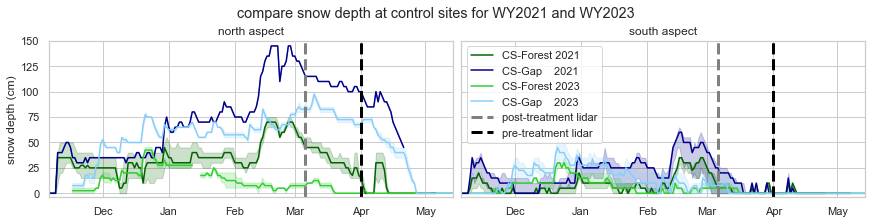

In [16]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (12,3), sharey=True, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2021
ax[0].fill_between(CNF21b['Date'], CNF21b['Maximum_depth'], CNF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0].fill_between(CNG21b['Date'], CNG21b['Maximum_depth'], CNG21b['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1].fill_between(CSF21b['Date'], CSF21b['Maximum_depth'], CSF21b['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CSG21b['Date'], CSG21b['Maximum_depth'], CSG21b['Minimum_depth'], color = colorg1, alpha = alpha)

ax[0].plot(CNF21b['Date'], CNF21b['Median_depth'], label = "CN-Forest 2021", color = colorf1)
ax[0].plot(CNG21b['Date'], CNG21b['Median_depth'], label = "CN-Gap    2021", color = colorg1)
ax[1].plot(CSF21b['Date'], CSF21b['Median_depth'], label = "CS-Forest 2021", color = colorf1)
ax[1].plot(CSG21b['Date'], CSG21b['Median_depth'], label = "CS-Gap    2021", color = colorg1)

#WY2023
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg2, alpha = alpha)
ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf2, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg2, alpha = alpha)

ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf2, label="CN-Forest 2023")
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg2, label="CN-Gap    2023")
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf2, label="CS-Forest 2023")
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg2, label="CS-Gap    2023")


# add lines for the lidar data flights
# ax[0].axvline(x=datetime.date(2021, 4, 1), color='k', linestyle='--', label="NCALM Lidar Flight")
# ax[1].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")


# set plotting constants
ax[0].set_ylim(-4,150)
ax[1].set_ylim(-4,150)

ax[0].set_xlim([datetime.date(2020, 11, 6), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("compare snow depth at control sites for WY2021 and WY2023")

# add lidar flight dates
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar", linewidth=3)
ax[0].axvline(x=datetime.date(2023, 4, 1), color='black', linestyle='--', label="pre-treatment lidar", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 4, 1), color='black', linestyle='--', label="pre-treatment lidar", linewidth=3)

ax[0].set_title("north aspect")
ax[1].set_title("south aspect")

# ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Okay, going to move to another notebook to normalize the snow depth timeseries 